In [688]:
data = """seeds: 79 14 55 13

seed-to-soil map:
50 98 2
52 50 48

soil-to-fertilizer map:
0 15 37
37 52 2
39 0 15

fertilizer-to-water map:
49 53 8
0 11 42
42 0 7
57 7 4

water-to-light map:
88 18 7
18 25 70

light-to-temperature map:
45 77 23
81 45 19
68 64 13

temperature-to-humidity map:
0 69 1
1 0 69

humidity-to-location map:
60 56 37
56 93 4"""

In [689]:
# with open(f'05.txt', 'r') as file:
#     data = file.read().strip()

In [690]:
seeds = data.split('\n\n')[0].split(': ')[-1].split()
seeds = [int(seed) for seed in seeds]

maps = data.split('\n\n')[1:]
maps = [item.split(':\n')[1] for item in maps]
maps = [item.split('\n') for item in maps]
maps = [[item.split() for item in map] for map in maps]
maps = [[[int(number) for number in item] for item in map] for map in maps]

In [691]:
def get_destination(number):
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
    return number


min_lowest_location = None
for seed in seeds:
    location = get_destination(seed)
    if not min_lowest_location or location < min_lowest_location:
        min_lowest_location = location

# puzzle 1
min_lowest_location

35

In [692]:
from itertools import batched

seed_bands = [[start, start+count-1] for start, count in batched(seeds, 2)]

In [693]:
# seed -> destination (too slow, commented)

# seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]
# 
# min_lowest_location = None
# for seed_band in seed_bands:
#     for seed in seed_band:
#         location = get_destination(seed)
#         if not min_lowest_location or location < min_lowest_location:
#             min_lowest_location = location
# 
# min_lowest_location

In [694]:
def get_seed(number):
    for map in maps[::-1]:
        for row in map:
        # imagining it flows right to left
            right_start, left_start, length = row
            if number in range(right_start, right_start+length):
                number = number - right_start + left_start
                break
    return number

In [695]:
# destination -> seed

seed_bands = [range(start, start+count-1) for start, count in batched(seeds, 2)]


tentative = 0
while True:
    location = get_seed(tentative)
    if any([location in band for band in seed_bands]):
        break
    tentative += 1

tentative

46

In [696]:
def get_path(number):
    path = [number]
    for map in maps:
        for row in map:
            # imagining it flows left to right
            right_start, left_start, length = row
            if number in range(left_start, left_start+length):
                number = number - left_start + right_start
                break
        path.append(number)
    return path

paths = []
for band in seed_bands:
    for seed in band:
        paths.append(get_path(seed))

In [697]:
maps[0]

[[50, 98, 2], [52, 50, 48]]

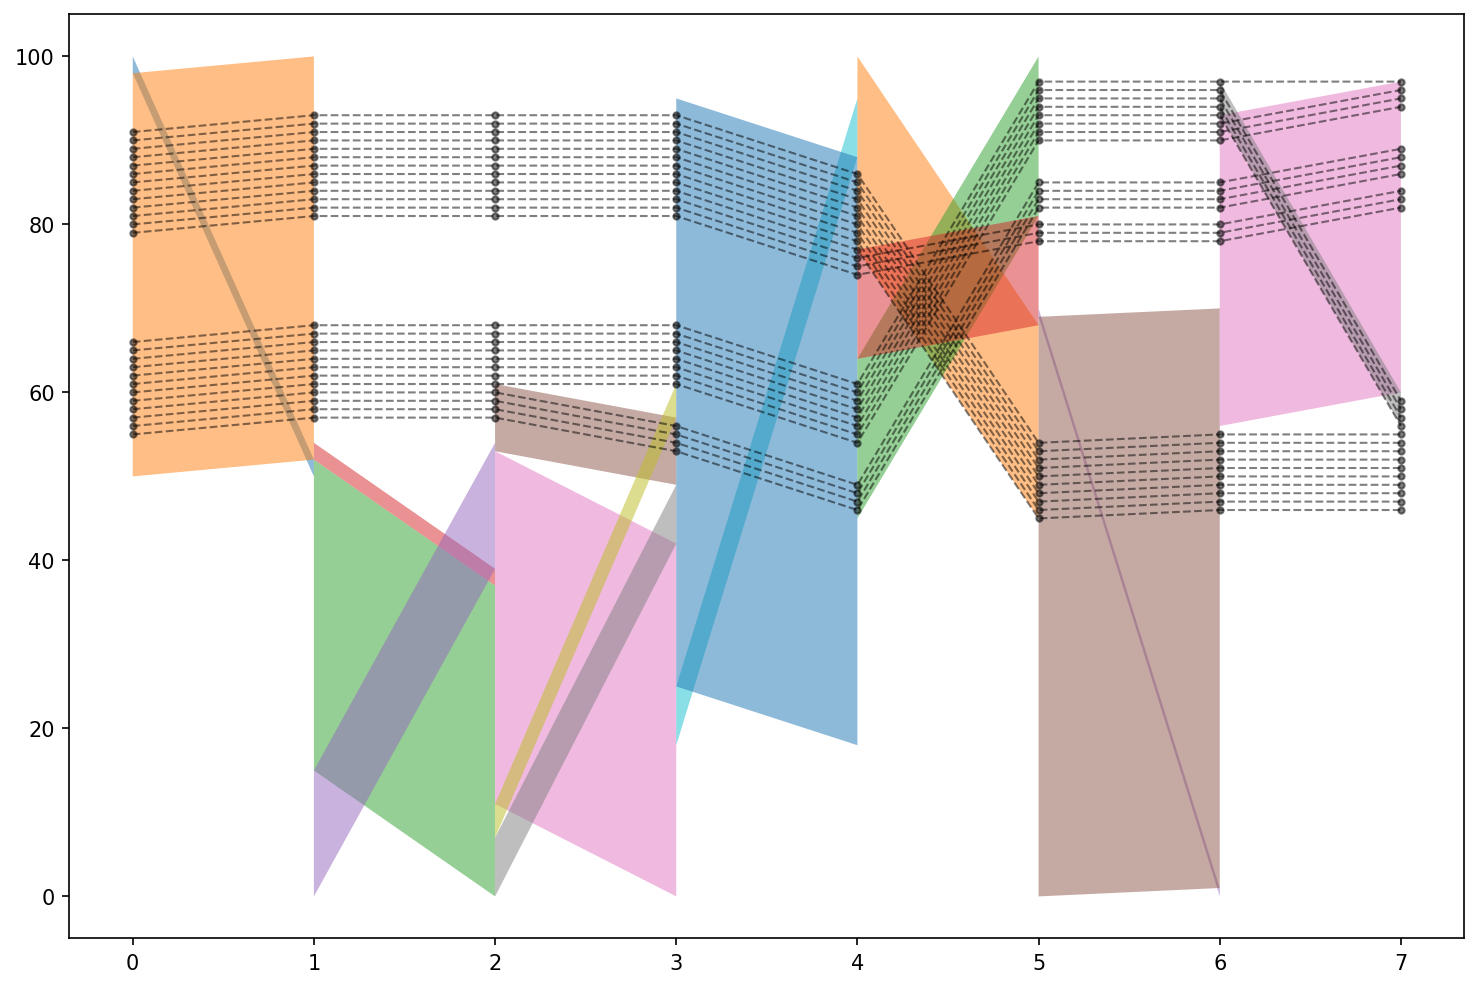

In [701]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8), dpi=150)

for path in paths:
    ax.plot(range(len(path)), path, c='black', ls='--', linewidth=1, marker='.', alpha=0.5)

for i, map in enumerate(maps):
    for j, row in enumerate(map):
        right_start, left_start, length = row
        top = [left_start+length, right_start+length]
        bottom = [left_start, right_start]
        ax.fill_between([i, i+1], top, bottom, alpha=0.5)

    
plt.show()

In [699]:
# 171711457
# 2762480372
# 2378348772
# 3305534543
# 937987465
# 352628782
# 201778106
# 171711461
# 171711460
# 223523059
# 166086528
# 95885756
# 171330852